# Tutorial 7: Visualization Styling and Themes

This comprehensive tutorial demonstrates how to create publication-ready figures with BrainTools' styling and theming capabilities. We'll explore neural-specific styles, colorblind-friendly palettes, custom colormaps, and export optimization techniques.

## Learning Objectives

By the end of this tutorial, you will be able to:
- Apply neural-specific styling for scientific publications
- Configure publication-ready formatting with optimal DPI settings
- Create dark mode themes for presentations
- Use colorblind-friendly color palettes
- Design custom colormaps for neural data
- Apply brain-specific colormaps (membrane, spikes, connectivity)
- Maintain style consistency across multiple plots
- Optimize export formats and quality for different media

## 1. Setup and Imports

In [2]:
from pathlib import Path

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Import braintools visualization and styling functions
from braintools.visualize.colormaps import (
    neural_style,
    publication_style,
    dark_style,
    colorblind_friendly_style,
    create_neural_colormap,
    brain_colormaps,
    apply_style,
    get_color_palette
)
from braintools.visualize.neural import (
    spike_raster,
    connectivity_matrix
)

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory for saved figures
output_dir = Path('styled_figures')
output_dir.mkdir(exist_ok=True)

print("BrainTools Styling and Themes Tutorial")
print("======================================")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

BrainTools Styling and Themes Tutorial
Output directory: D:\codes\projects\braintools\docs\styled_figures
Matplotlib version: 3.10.6


## 2. Generate Sample Neural Data

In [3]:
# Generate synthetic neural data for demonstrations

def generate_sample_data():
    """Generate various types of neural data for styling demonstrations."""

    # 1. Spike trains
    n_neurons = 30
    duration = 5.0
    spike_trains = []
    for i in range(n_neurons):
        n_spikes = np.random.poisson(5 * duration)
        spike_times = np.sort(np.random.uniform(0, duration, n_spikes))
        spike_trains.append(spike_times)

    # 2. Time series data (membrane potential)
    time = np.linspace(0, 5, 1000)
    membrane_potential = -70 + 10 * np.sin(2 * np.pi * time) + \
                         5 * np.sin(10 * np.pi * time) + \
                         np.random.normal(0, 2, len(time))

    # 3. Population activity
    population_data = np.random.rand(1000, n_neurons)
    for i in range(n_neurons):
        population_data[:, i] = np.convolve(population_data[:, i],
                                            np.ones(20) / 20, mode='same')

    # 4. Connectivity matrix
    connectivity = np.random.randn(20, 20)
    connectivity = (connectivity + connectivity.T) / 2  # Symmetrize
    np.fill_diagonal(connectivity, 0)

    # 5. 2D firing rate map
    x = np.linspace(-1, 1, 50)
    y = np.linspace(-1, 1, 50)
    X, Y = np.meshgrid(x, y)
    firing_map = 10 * np.exp(-(X ** 2 + Y ** 2) / 0.5) + \
                 5 * np.exp(-((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 0.2)

    # 6. Neural trajectory
    trajectory = np.column_stack([
        np.sin(np.linspace(0, 4 * np.pi, 200)),
        np.cos(np.linspace(0, 4 * np.pi, 200)),
        np.linspace(0, 2, 200)
    ])

    return {
        'spike_trains': spike_trains,
        'time': time,
        'membrane_potential': membrane_potential,
        'population_data': population_data,
        'connectivity': connectivity,
        'firing_map': firing_map,
        'trajectory': trajectory
    }


# Generate all sample data
data = generate_sample_data()
print("Sample data generated:")
for key, value in data.items():
    if isinstance(value, list):
        print(f"  {key}: {len(value)} items")
    else:
        print(f"  {key}: shape {value.shape}")

Sample data generated:
  spike_trains: 30 items
  time: shape (1000,)
  membrane_potential: shape (1000,)
  population_data: shape (1000, 30)
  connectivity: shape (20, 20)
  firing_map: shape (50, 50)
  trajectory: shape (200, 3)


## 3. Neural-Specific Styling

Neural-specific styles are optimized for displaying spike data, membrane potentials, and other neurophysiological signals.

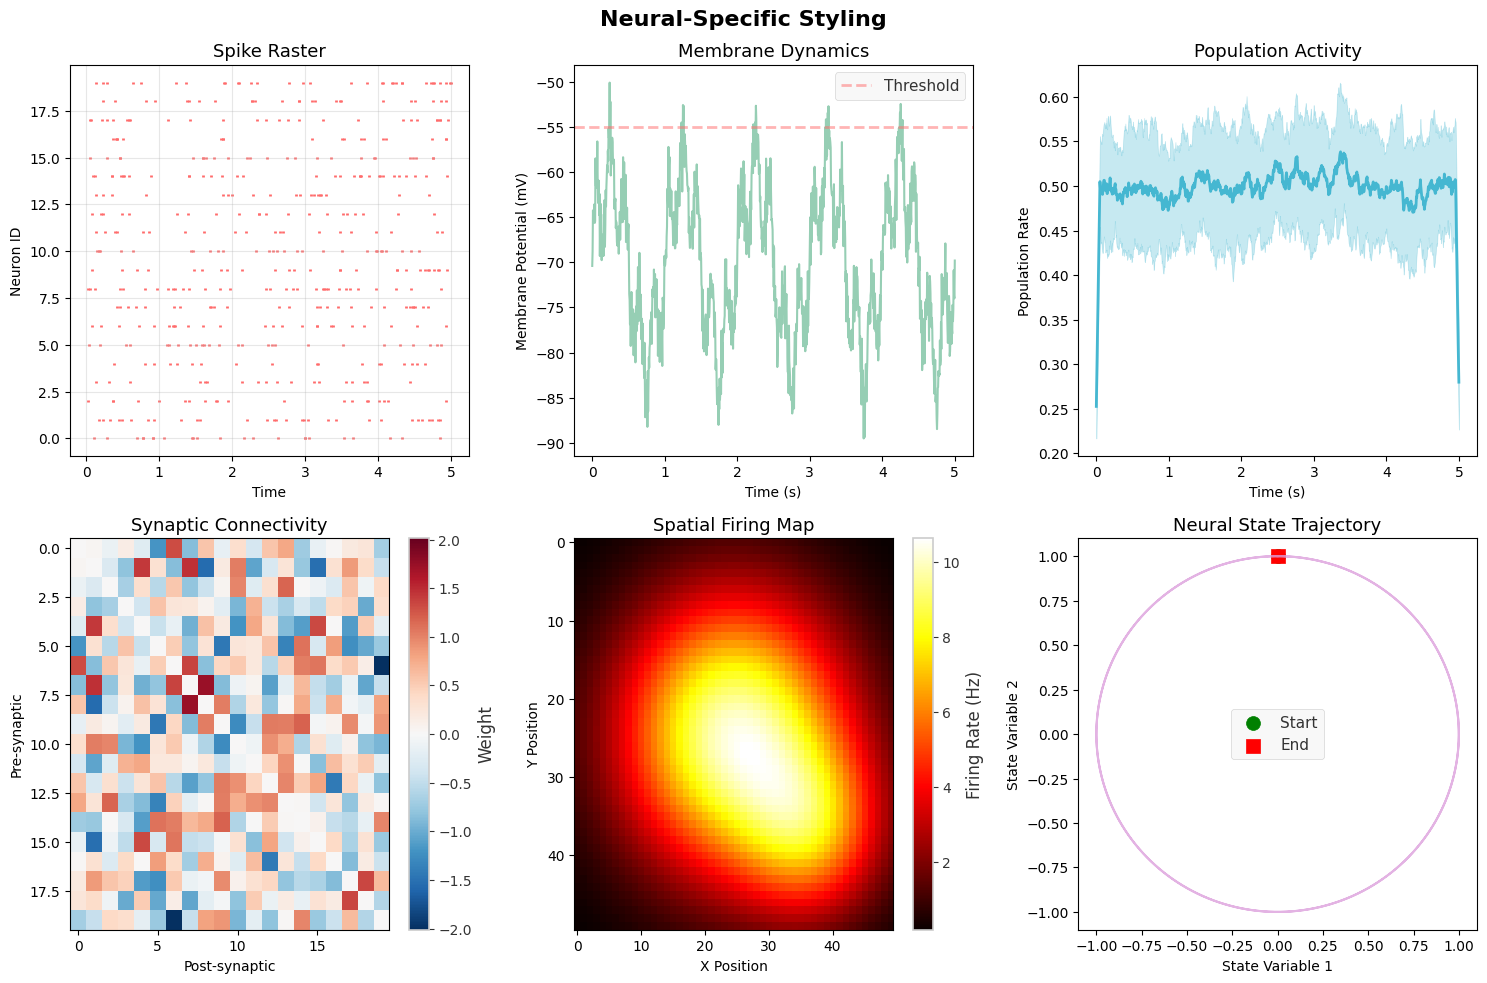


Neural Style Features:
- Optimized color palette for neural data
- Clear grid for temporal alignment
- Appropriate line weights for different data types
- Consistent styling across plot types


In [4]:
# Demonstrate neural-specific styling

# Reset to default matplotlib style first
plt.rcParams.update(plt.rcParamsDefault)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Neural-Specific Styling', fontsize=16, fontweight='bold')

# Apply neural style
neural_style(fontsize=11)

# 1. Spike raster with neural style
spike_raster(data['spike_trains'][:20], ax=axes[0, 0],
             title="Spike Raster", color='#FF6B6B')

# 2. Membrane potential
axes[0, 1].plot(data['time'], data['membrane_potential'],
                color='#96CEB4', linewidth=1.5)
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Membrane Potential (mV)')
axes[0, 1].set_title('Membrane Dynamics')
axes[0, 1].axhline(-55, color='#FF6B6B', linestyle='--',
                   alpha=0.5, label='Threshold')
axes[0, 1].legend()

# 3. Population activity
population_mean = np.mean(data['population_data'], axis=1)
population_std = np.std(data['population_data'], axis=1)
time_pop = np.linspace(0, 5, len(population_mean))

axes[0, 2].plot(time_pop, population_mean, color='#45B7D1', linewidth=2)
axes[0, 2].fill_between(time_pop,
                        population_mean - population_std,
                        population_mean + population_std,
                        color='#45B7D1', alpha=0.3)
axes[0, 2].set_xlabel('Time (s)')
axes[0, 2].set_ylabel('Population Rate')
axes[0, 2].set_title('Population Activity')

# 4. Connectivity matrix
connectivity_matrix(data['connectivity'], ax=axes[1, 0],
                    title="Synaptic Connectivity",
                    cmap='RdBu_r', center_zero=True)

# 5. Firing rate map
im = axes[1, 1].imshow(data['firing_map'], cmap='hot', aspect='auto')
axes[1, 1].set_title('Spatial Firing Map')
axes[1, 1].set_xlabel('X Position')
axes[1, 1].set_ylabel('Y Position')
plt.colorbar(im, ax=axes[1, 1], label='Firing Rate (Hz)')

# 6. Phase plot
axes[1, 2].plot(data['trajectory'][:, 0], data['trajectory'][:, 1],
                color='#DDA0DD', linewidth=1.5, alpha=0.8)
axes[1, 2].scatter(data['trajectory'][0, 0], data['trajectory'][0, 1],
                   color='green', s=100, marker='o', label='Start')
axes[1, 2].scatter(data['trajectory'][-1, 0], data['trajectory'][-1, 1],
                   color='red', s=100, marker='s', label='End')
axes[1, 2].set_xlabel('State Variable 1')
axes[1, 2].set_ylabel('State Variable 2')
axes[1, 2].set_title('Neural State Trajectory')
axes[1, 2].legend()

plt.tight_layout()
# plt.savefig(output_dir / 'neural_style.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNeural Style Features:")
print("- Optimized color palette for neural data")
print("- Clear grid for temporal alignment")
print("- Appropriate line weights for different data types")
print("- Consistent styling across plot types")

## 4. Publication-Ready Formatting

Publication style ensures your figures meet journal requirements with proper formatting, resolution, and typography.

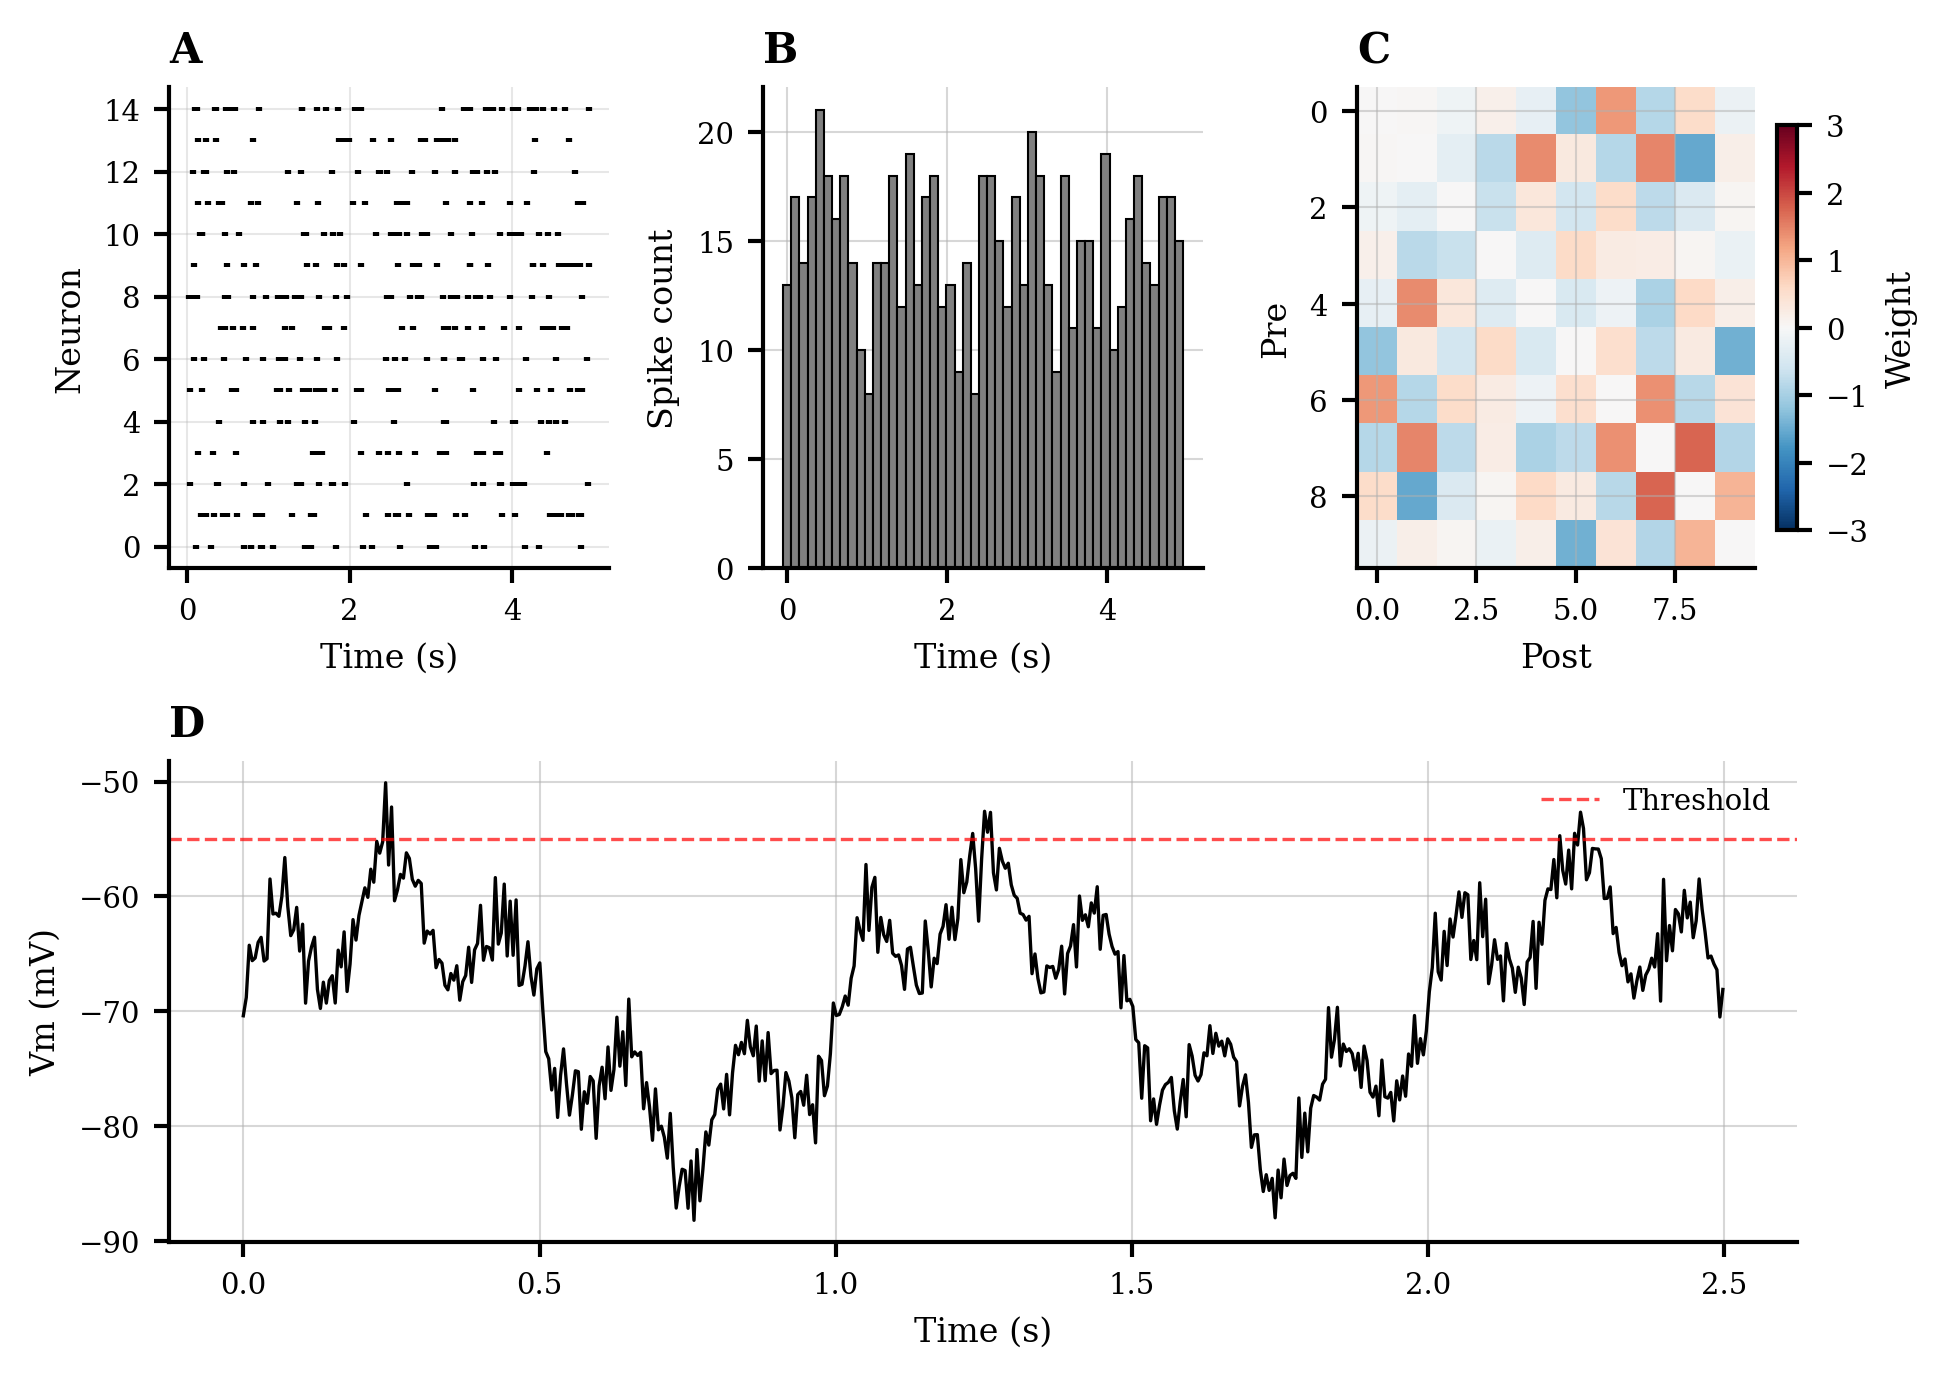


Publication Style Features:
- High DPI (300) for print quality
- Appropriate figure size for journal columns
- Clear panel labels (A, B, C, D)
- Minimal spines and clean appearance
- Saved in multiple formats (PDF, EPS, PNG)
- Files saved to: D:\codes\projects\braintools\docs\styled_figures


In [5]:
# Reset and apply publication style
plt.rcParams.update(plt.rcParamsDefault)
publication_style(fontsize=8, figsize=(7, 5), dpi=300)

# Create multi-panel figure for publication
fig = plt.figure(figsize=(7, 5))  # Single column width for journals

# Define grid layout
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.35)

# Panel A: Spike raster
ax_a = fig.add_subplot(gs[0, 0])
spike_raster(data['spike_trains'][:15], ax=ax_a,
             color='black', markersize=0.8)
ax_a.set_title('A', loc='left', fontweight='bold', fontsize=10)
ax_a.set_xlabel('Time (s)', fontsize=8)
ax_a.set_ylabel('Neuron', fontsize=8)

# Panel B: Firing rate
ax_b = fig.add_subplot(gs[0, 1])
time_bins = np.linspace(0, 5, 50)
spike_counts = np.histogram(np.concatenate(data['spike_trains']),
                            bins=time_bins)[0]
ax_b.bar(time_bins[:-1], spike_counts, width=np.diff(time_bins)[0],
         color='gray', edgecolor='black', linewidth=0.5)
ax_b.set_title('B', loc='left', fontweight='bold', fontsize=10)
ax_b.set_xlabel('Time (s)', fontsize=8)
ax_b.set_ylabel('Spike count', fontsize=8)

# Panel C: Connectivity
ax_c = fig.add_subplot(gs[0, 2])
im_c = ax_c.imshow(data['connectivity'][:10, :10],
                   cmap='RdBu_r', vmin=-3, vmax=3, aspect='auto')
ax_c.set_title('C', loc='left', fontweight='bold', fontsize=10)
ax_c.set_xlabel('Post', fontsize=8)
ax_c.set_ylabel('Pre', fontsize=8)
cbar_c = plt.colorbar(im_c, ax=ax_c, fraction=0.046)
cbar_c.set_label('Weight', fontsize=8)
cbar_c.ax.tick_params(labelsize=7)

# Panel D: Time series
ax_d = fig.add_subplot(gs[1, :])
ax_d.plot(data['time'][:500], data['membrane_potential'][:500],
          'k-', linewidth=0.8)
ax_d.axhline(-55, color='red', linestyle='--', linewidth=0.8,
             alpha=0.7, label='Threshold')
ax_d.set_title('D', loc='left', fontweight='bold', fontsize=10)
ax_d.set_xlabel('Time (s)', fontsize=8)
ax_d.set_ylabel('Vm (mV)', fontsize=8)
ax_d.legend(fontsize=7, loc='upper right')
ax_d.spines['top'].set_visible(False)
ax_d.spines['right'].set_visible(False)

# Adjust tick label sizes
for ax in [ax_a, ax_b, ax_c, ax_d]:
    ax.tick_params(labelsize=7)

# # Save in multiple formats for publication
# fig.savefig(output_dir / 'publication_figure.pdf', dpi=300, bbox_inches='tight')
# fig.savefig(output_dir / 'publication_figure.eps', dpi=300, bbox_inches='tight')
# fig.savefig(output_dir / 'publication_figure.png', dpi=300, bbox_inches='tight')

plt.show()

print("\nPublication Style Features:")
print("- High DPI (300) for print quality")
print("- Appropriate figure size for journal columns")
print("- Clear panel labels (A, B, C, D)")
print("- Minimal spines and clean appearance")
print("- Saved in multiple formats (PDF, EPS, PNG)")
print(f"- Files saved to: {output_dir.absolute()}")

## 5. Dark Mode Themes

Dark themes are ideal for presentations and reduce eye strain during extended viewing.

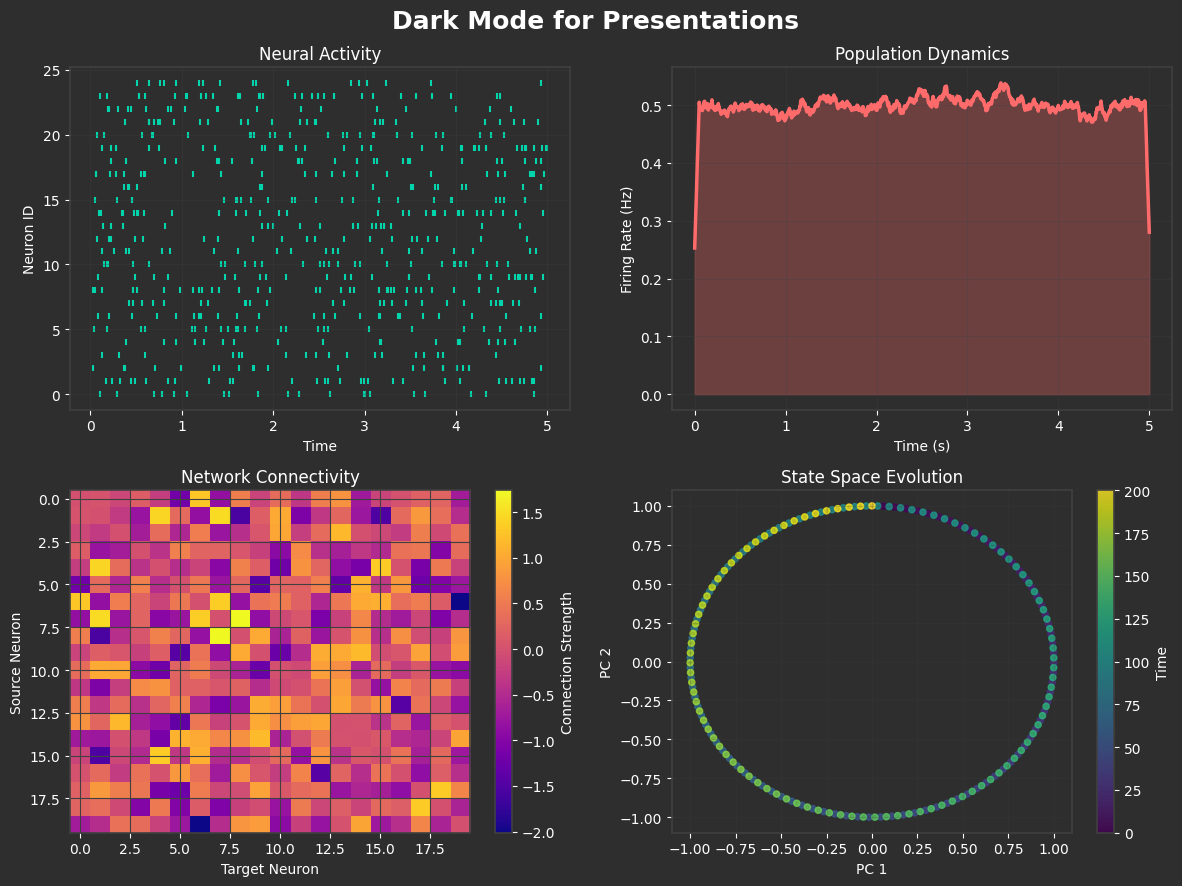


Dark Mode Features:
- High contrast colors on dark background
- Reduced eye strain for presentations
- Vibrant accent colors (cyan, red, yellow)
- Subtle grid lines for reference
- Optimized for projection and screens


In [6]:
# Reset and apply dark style
plt.rcParams.update(plt.rcParamsDefault)
dark_style()

# Create presentation-ready dark theme figure
fig, axes = plt.subplots(2, 2, figsize=(12, 9), facecolor='#2E2E2E')
fig.suptitle('Dark Mode for Presentations', fontsize=18,
             fontweight='bold', color='white')

# 1. Spike raster with dark theme
spike_raster(data['spike_trains'][:25], ax=axes[0, 0],
             title="Neural Activity", color='#00D4AA',
             marker='|', markersize=15)

# 2. Population dynamics
pop_mean = np.mean(data['population_data'], axis=1)
pop_time = np.linspace(0, 5, len(pop_mean))
axes[0, 1].plot(pop_time, pop_mean, color='#FF6B6B', linewidth=2.5)
axes[0, 1].fill_between(pop_time, 0, pop_mean,
                        color='#FF6B6B', alpha=0.3)
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Firing Rate (Hz)')
axes[0, 1].set_title('Population Dynamics')
axes[0, 1].grid(True, alpha=0.3)

# 3. Connectivity heatmap
im = axes[1, 0].imshow(data['connectivity'], cmap='plasma',
                       aspect='auto', interpolation='nearest')
axes[1, 0].set_title('Network Connectivity')
axes[1, 0].set_xlabel('Target Neuron')
axes[1, 0].set_ylabel('Source Neuron')
cbar = plt.colorbar(im, ax=axes[1, 0])
cbar.set_label('Connection Strength', color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# 4. State space trajectory
t = np.linspace(0, len(data['trajectory']), len(data['trajectory']))
scatter = axes[1, 1].scatter(data['trajectory'][:, 0],
                             data['trajectory'][:, 1],
                             c=t, cmap='viridis', s=20, alpha=0.8)
axes[1, 1].set_xlabel('PC 1')
axes[1, 1].set_ylabel('PC 2')
axes[1, 1].set_title('State Space Evolution')
axes[1, 1].grid(True, alpha=0.2)
cbar2 = plt.colorbar(scatter, ax=axes[1, 1])
cbar2.set_label('Time', color='white')
cbar2.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar2.ax.axes, 'yticklabels'), color='white')

# Ensure all text is visible
for ax in axes.flat:
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    for spine in ax.spines.values():
        spine.set_edgecolor('#404040')

plt.tight_layout()
# plt.savefig(output_dir / 'dark_mode.png', dpi=150, facecolor='#2E2E2E', edgecolor='none')
plt.show()

print("\nDark Mode Features:")
print("- High contrast colors on dark background")
print("- Reduced eye strain for presentations")
print("- Vibrant accent colors (cyan, red, yellow)")
print("- Subtle grid lines for reference")
print("- Optimized for projection and screens")

## 6. Colorblind-Friendly Palettes

Ensuring accessibility through colorblind-friendly color choices is essential for inclusive scientific communication.

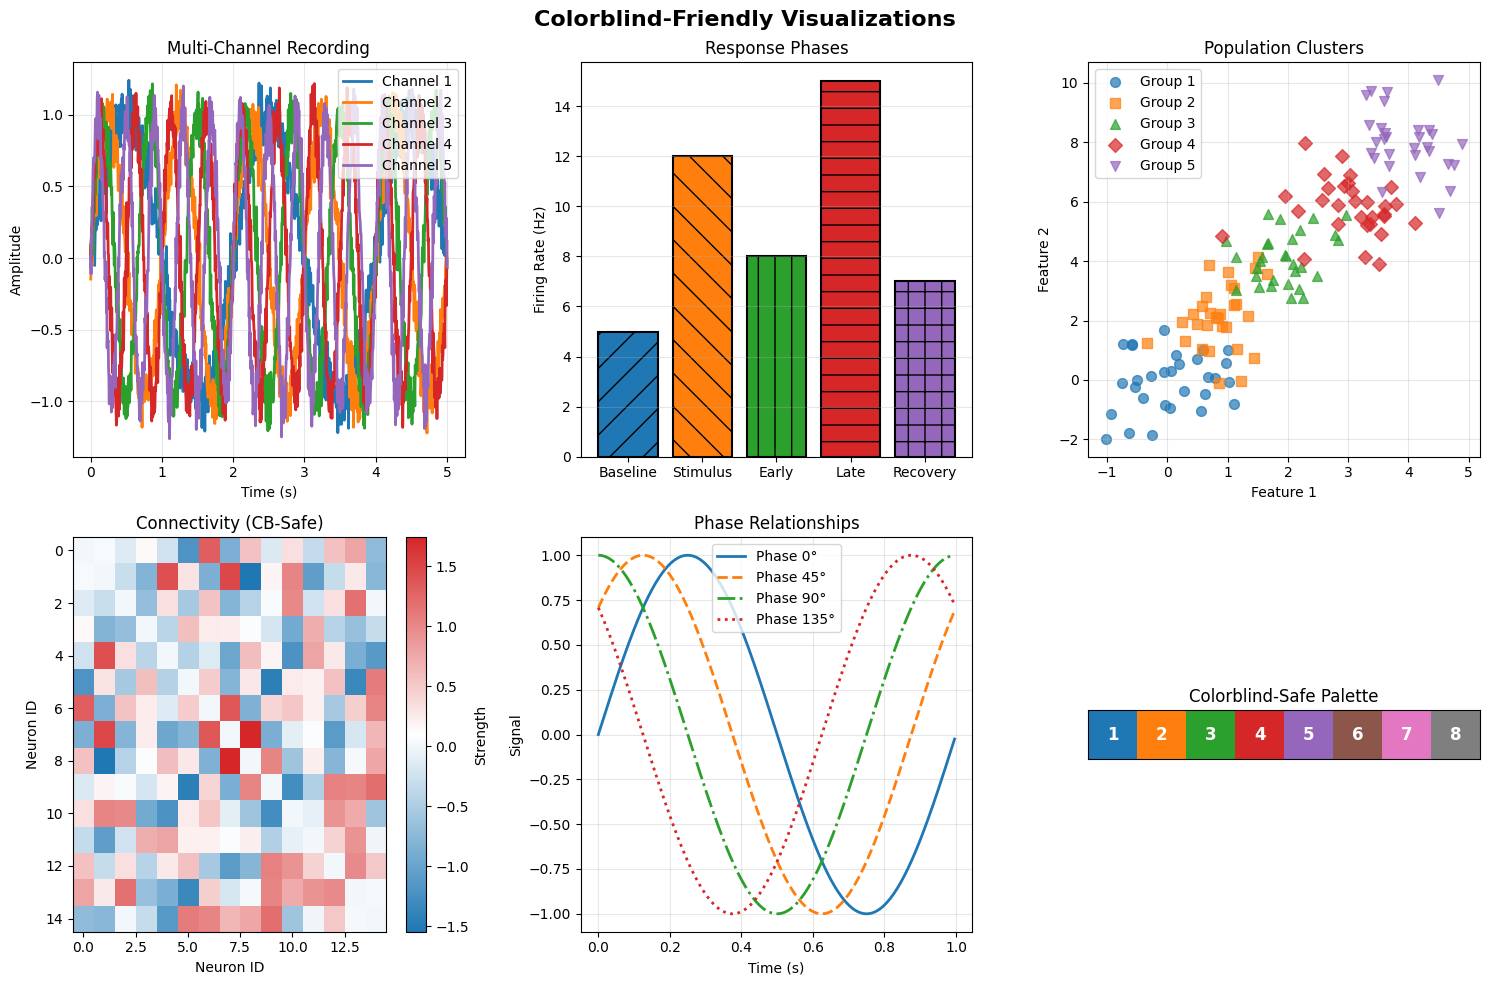


Colorblind-Friendly Features:
- Distinct colors visible to all color vision types
- Use of patterns and shapes for redundant encoding
- Different line styles for distinction
- Carefully chosen color combinations
- Tested palette: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


In [7]:
# Reset and apply colorblind-friendly style
plt.rcParams.update(plt.rcParamsDefault)
colorblind_friendly_style()

# Get colorblind-friendly palette
cb_colors = get_color_palette('colorblind', n_colors=8)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Colorblind-Friendly Visualizations', fontsize=16, fontweight='bold')

# 1. Multiple time series with distinct colors
for i in range(5):
    signal = np.sin(2 * np.pi * data['time'] * (i + 1) / 2) + \
             np.random.normal(0, 0.1, len(data['time']))
    axes[0, 0].plot(data['time'], signal, color=cb_colors[i],
                    linewidth=2, label=f'Channel {i + 1}')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Multi-Channel Recording')
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar plot with patterns for additional distinction
categories = ['Baseline', 'Stimulus', 'Early', 'Late', 'Recovery']
values = [5, 12, 8, 15, 7]
patterns = ['/', '\\', '|', '-', '+']

bars = axes[0, 1].bar(categories, values, color=cb_colors[:5],
                      edgecolor='black', linewidth=1.5)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
axes[0, 1].set_ylabel('Firing Rate (Hz)')
axes[0, 1].set_title('Response Phases')
axes[0, 1].grid(True, axis='y', alpha=0.3)

# 3. Scatter plot with shapes and colors
markers = ['o', 's', '^', 'D', 'v']
for i in range(5):
    x = np.random.normal(i, 0.5, 30)
    y = np.random.normal(i * 2, 1, 30)
    axes[0, 2].scatter(x, y, color=cb_colors[i], marker=markers[i],
                       s=50, alpha=0.7, label=f'Group {i + 1}')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')
axes[0, 2].set_title('Population Clusters')
axes[0, 2].legend(loc='upper left')
axes[0, 2].grid(True, alpha=0.3)

# 4. Heatmap with colorblind-safe colormap
# Create a colorblind-friendly colormap
cb_cmap = LinearSegmentedColormap.from_list('cb_map', [cb_colors[0], 'white', cb_colors[3]])
im = axes[1, 0].imshow(data['connectivity'][:15, :15],
                       cmap=cb_cmap, aspect='auto')
axes[1, 0].set_title('Connectivity (CB-Safe)')
axes[1, 0].set_xlabel('Neuron ID')
axes[1, 0].set_ylabel('Neuron ID')
plt.colorbar(im, ax=axes[1, 0], label='Strength')

# 5. Line plot with different line styles
line_styles = ['-', '--', '-.', ':']
for i in range(4):
    phase_shifted = np.sin(2 * np.pi * data['time'] + i * np.pi / 4)
    axes[1, 1].plot(data['time'][:200],
                    phase_shifted[:200],
                    color=cb_colors[i],
                    linestyle=line_styles[i],
                    linewidth=2,
                    label=f'Phase {i * 45}°')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Signal')
axes[1, 1].set_title('Phase Relationships')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Color palette demonstration
axes[1, 2].set_title('Colorblind-Safe Palette')
for i, color in enumerate(cb_colors[:8]):
    axes[1, 2].add_patch(mpatches.Rectangle((i, 0), 1, 1, facecolor=color))
    axes[1, 2].text(i + 0.5, 0.5, f'{i + 1}',
                    ha='center', va='center',
                    color='white', fontweight='bold', fontsize=12)
axes[1, 2].set_xlim(0, 8)
axes[1, 2].set_ylim(0, 1)
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])
axes[1, 2].set_aspect('equal')

plt.tight_layout()
# plt.savefig(output_dir / 'colorblind_friendly.png', dpi=150)
plt.show()

print("\nColorblind-Friendly Features:")
print("- Distinct colors visible to all color vision types")
print("- Use of patterns and shapes for redundant encoding")
print("- Different line styles for distinction")
print("- Carefully chosen color combinations")
print("- Tested palette:", cb_colors[:5])

## 7. Custom Colormaps for Neural Data

Creating custom colormaps tailored to specific neural data types enhances visualization clarity.

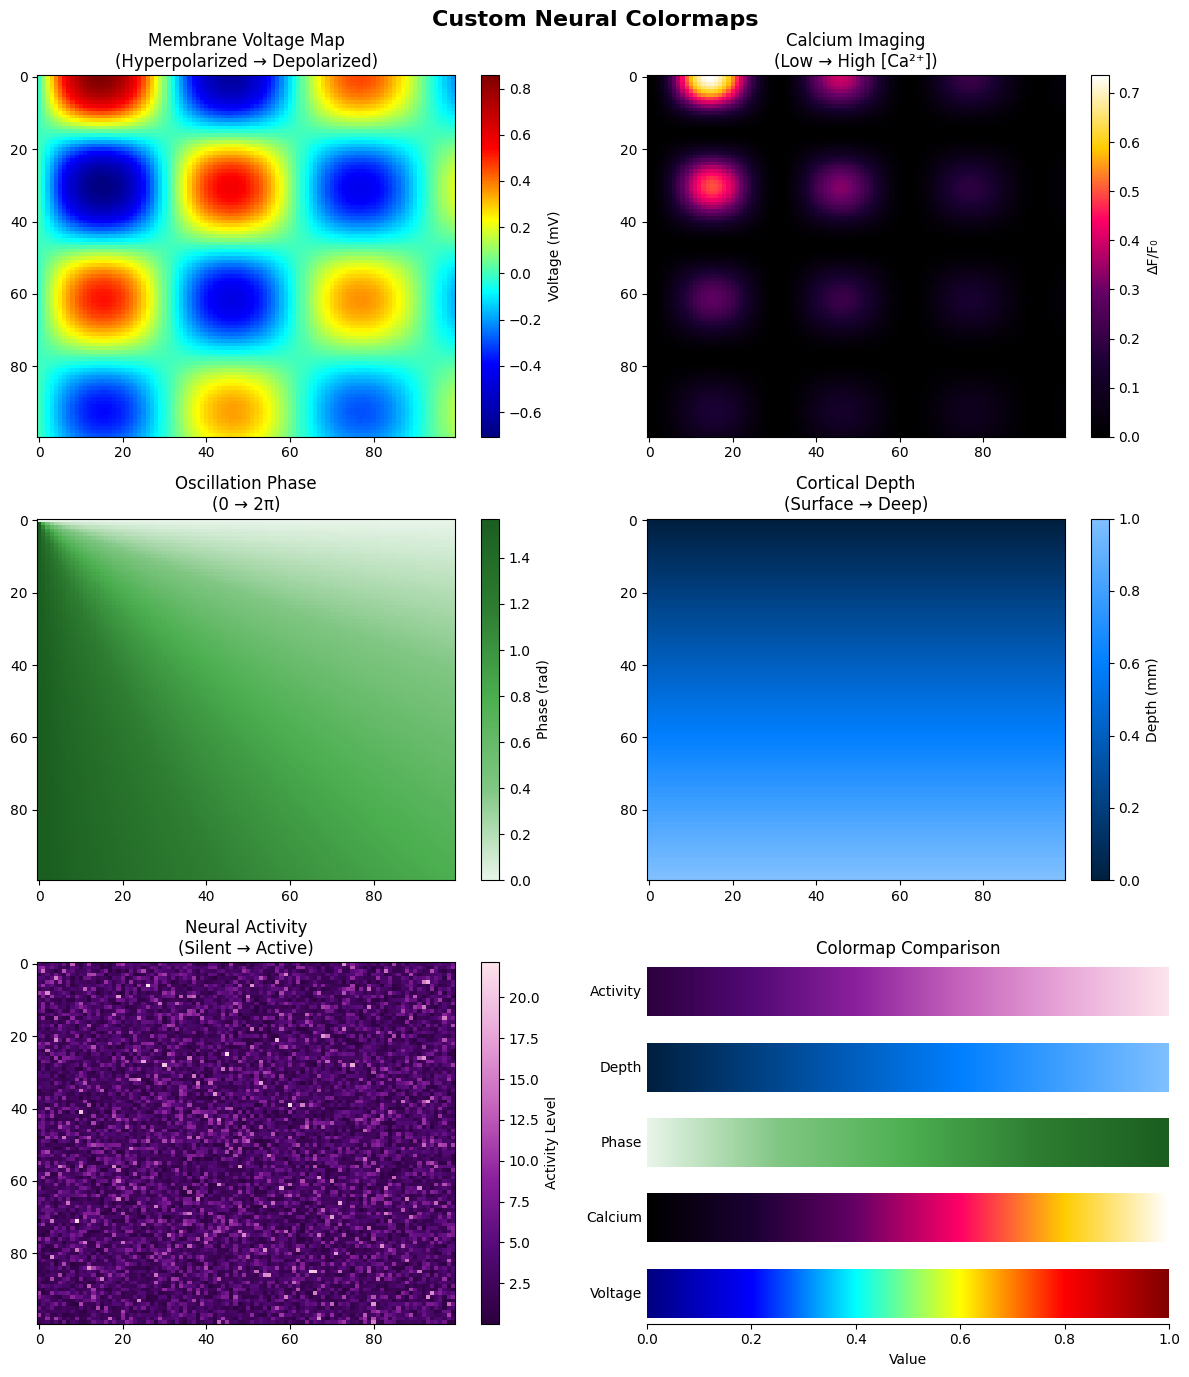


Custom Colormap Features:
- Voltage: Blue (hyperpolarized) to Red (depolarized)
- Calcium: Black to White through purple (fluorescence)
- Phase: Green gradient for oscillation phases
- Depth: Ocean blues for cortical layers
- Activity: Purple gradient for activity levels


In [8]:
# Create and demonstrate custom neural colormaps

# Reset matplotlib
plt.rcParams.update(plt.rcParamsDefault)

# Define custom colormaps for different neural data types
custom_cmaps = {
    'voltage': ['#000080', '#0000FF', '#00FFFF', '#FFFF00', '#FF0000', '#800000'],
    'calcium': ['#000000', '#1a0033', '#660066', '#ff0066', '#ffcc00', '#ffffff'],
    'phase': ['#E8F5E9', '#81C784', '#4CAF50', '#2E7D32', '#1B5E20'],
    'depth': ['#001f3f', '#003f7f', '#005fbf', '#007fff', '#40a0ff', '#80c0ff'],
    'activity': ['#2c003e', '#520975', '#8b209c', '#c563bc', '#e8a6d8', '#fce4ec']
}

# Register custom colormaps
for name, colors in custom_cmaps.items():
    create_neural_colormap(f'neural_{name}', colors)

# Demonstrate custom colormaps
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
fig.suptitle('Custom Neural Colormaps', fontsize=16, fontweight='bold')

# Generate test data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) * np.exp(-0.1 * np.sqrt(X ** 2 + Y ** 2))

# 1. Voltage colormap (membrane potential)
im1 = axes[0, 0].imshow(Z, cmap='neural_voltage', aspect='auto')
axes[0, 0].set_title('Membrane Voltage Map\n(Hyperpolarized → Depolarized)')
plt.colorbar(im1, ax=axes[0, 0], label='Voltage (mV)')

# 2. Calcium colormap (fluorescence imaging)
Z_calcium = np.abs(Z) ** 2
im2 = axes[0, 1].imshow(Z_calcium, cmap='neural_calcium', aspect='auto')
axes[0, 1].set_title('Calcium Imaging\n(Low → High [Ca²⁺])')
plt.colorbar(im2, ax=axes[0, 1], label='ΔF/F₀')

# 3. Phase colormap (oscillations)
Z_phase = np.angle(X + 1j * Y)
im3 = axes[1, 0].imshow(Z_phase, cmap='neural_phase', aspect='auto')
axes[1, 0].set_title('Oscillation Phase\n(0 → 2π)')
plt.colorbar(im3, ax=axes[1, 0], label='Phase (rad)')

# 4. Depth colormap (laminar recordings)
Z_depth = np.linspace(0, 1, 100).reshape(-1, 1) * np.ones((100, 100))
im4 = axes[1, 1].imshow(Z_depth, cmap='neural_depth', aspect='auto')
axes[1, 1].set_title('Cortical Depth\n(Surface → Deep)')
plt.colorbar(im4, ax=axes[1, 1], label='Depth (mm)')

# 5. Activity colormap (general neural activity)
Z_activity = np.random.gamma(2, 2, (100, 100))
im5 = axes[2, 0].imshow(Z_activity, cmap='neural_activity', aspect='auto')
axes[2, 0].set_title('Neural Activity\n(Silent → Active)')
plt.colorbar(im5, ax=axes[2, 0], label='Activity Level')

# 6. Colormap comparison
axes[2, 1].set_title('Colormap Comparison')
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

y_positions = np.linspace(0, 1, len(custom_cmaps))
for i, (name, colors) in enumerate(custom_cmaps.items()):
    cmap = plt.get_cmap(f'neural_{name}')
    axes[2, 1].imshow(gradient,
                      extent=[0, 1, y_positions[i] - 0.08, y_positions[i] + 0.08],
                      aspect='auto',
                      cmap=cmap)
    axes[2, 1].text(-0.01,
                    y_positions[i],
                    name.capitalize(),
                    ha='right',
                    va='center',
                    fontsize=10)

axes[2, 1].set_xlim(0, 1)
axes[2, 1].set_ylim(-0.1, 1.1)
axes[2, 1].set_xlabel('Value')
axes[2, 1].set_yticks([])
axes[2, 1].spines['left'].set_visible(False)
axes[2, 1].spines['right'].set_visible(False)
axes[2, 1].spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig(output_dir / 'custom_colormaps.png', dpi=150)
plt.show()

print("\nCustom Colormap Features:")
print("- Voltage: Blue (hyperpolarized) to Red (depolarized)")
print("- Calcium: Black to White through purple (fluorescence)")
print("- Phase: Green gradient for oscillation phases")
print("- Depth: Ocean blues for cortical layers")
print("- Activity: Purple gradient for activity levels")

## 8. Brain-Specific Colormaps

Specialized colormaps designed for common neuroscience visualization needs.

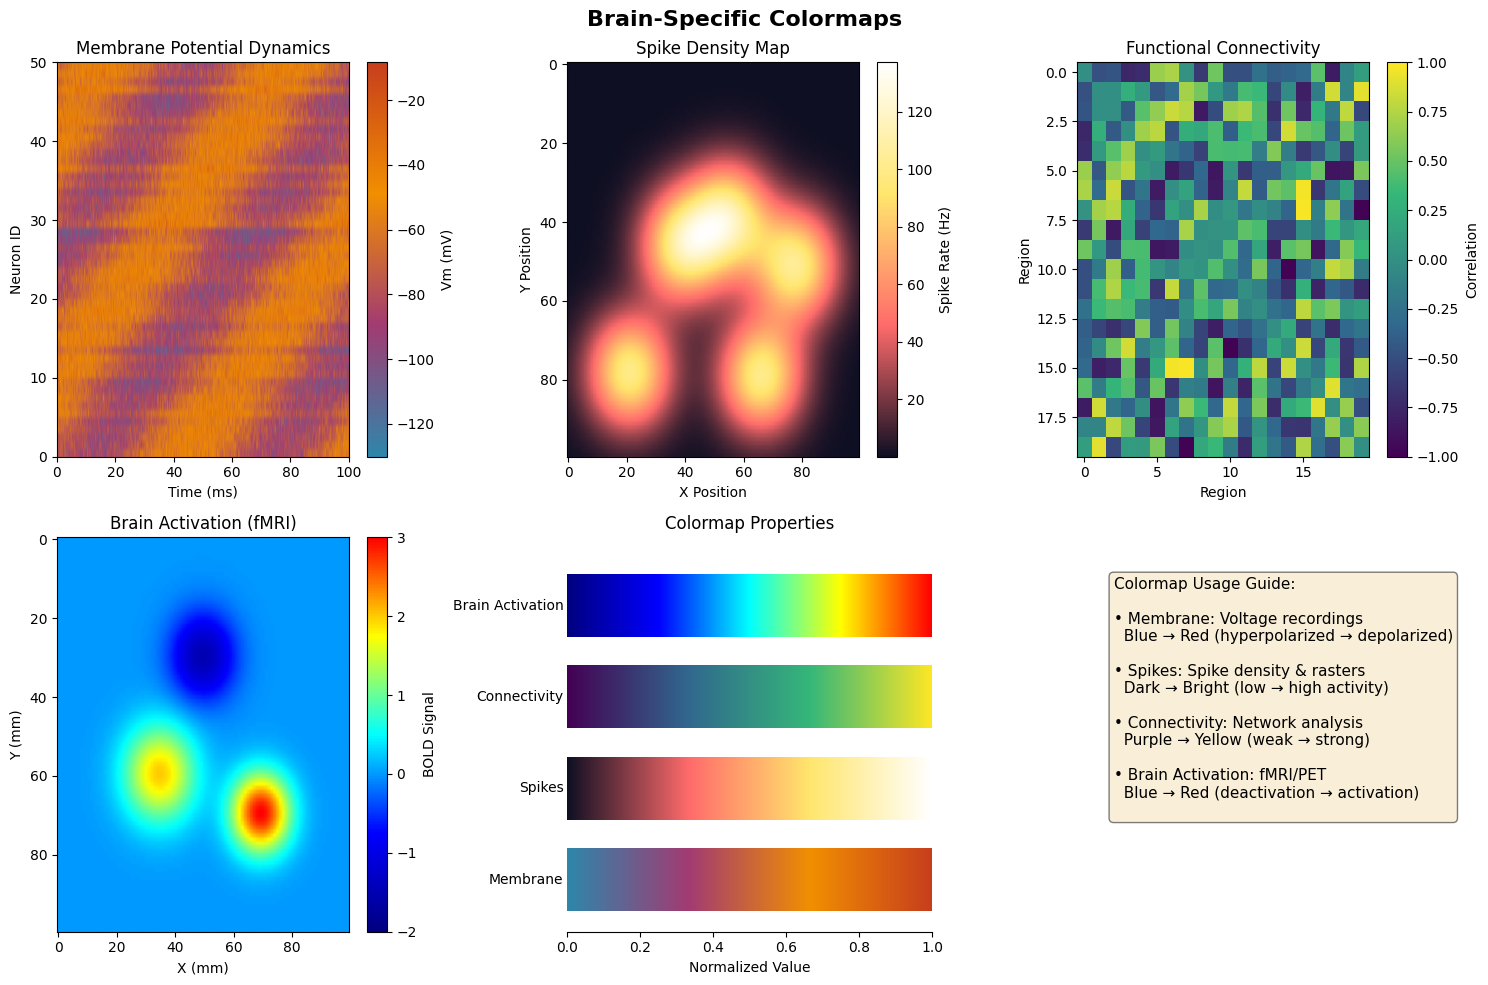


Brain-Specific Colormaps:
- Optimized for common neuroscience data types
- Perceptually uniform for accurate representation
- Intuitive color associations (hot/cold, dark/light)
- Suitable for both screen and print


In [9]:
# Register and demonstrate brain-specific colormaps
brain_colormaps()

# Create demonstration figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Brain-Specific Colormaps', fontsize=16, fontweight='bold')

# Generate different types of neural data
np.random.seed(42)

# 1. Membrane potential dynamics
time_membrane = np.linspace(0, 100, 1000)
neurons_membrane = 50
membrane_data = np.zeros((len(time_membrane), neurons_membrane))
for i in range(neurons_membrane):
    baseline = -70 + np.random.randn() * 5
    membrane_data[:, i] = baseline + 20 * np.sin(0.1 * time_membrane + i / 5) + \
                          10 * np.random.randn(len(time_membrane))

im1 = axes[0, 0].imshow(membrane_data.T,
                        aspect='auto',
                        cmap='membrane',
                        extent=[0, 100, 0, neurons_membrane])
axes[0, 0].set_title('Membrane Potential Dynamics')
axes[0, 0].set_xlabel('Time (ms)')
axes[0, 0].set_ylabel('Neuron ID')
plt.colorbar(im1, ax=axes[0, 0], label='Vm (mV)')

# 2. Spike density
spike_density = np.zeros((100, 100))
n_centers = 5
for _ in range(n_centers):
    cx, cy = np.random.randint(20, 80, 2)
    x_grid, y_grid = np.ogrid[:100, :100]
    dist = np.sqrt((x_grid - cx) ** 2 + (y_grid - cy) ** 2)
    spike_density += 100 * np.exp(-dist ** 2 / 200)

im2 = axes[0, 1].imshow(spike_density, cmap='spikes', aspect='auto')
axes[0, 1].set_title('Spike Density Map')
axes[0, 1].set_xlabel('X Position')
axes[0, 1].set_ylabel('Y Position')
plt.colorbar(im2, ax=axes[0, 1], label='Spike Rate (Hz)')

# 3. Connectivity strength
n_regions = 20
connectivity_data = np.random.randn(n_regions, n_regions)
connectivity_data = (connectivity_data + connectivity_data.T) / 2
np.fill_diagonal(connectivity_data, 0)
connectivity_data = np.tanh(connectivity_data)  # Bound between -1 and 1

im3 = axes[0, 2].imshow(connectivity_data, cmap='connectivity',
                        aspect='auto', vmin=-1, vmax=1)
axes[0, 2].set_title('Functional Connectivity')
axes[0, 2].set_xlabel('Region')
axes[0, 2].set_ylabel('Region')
plt.colorbar(im3, ax=axes[0, 2], label='Correlation')

# 4. Brain activation (fMRI-like)
x_brain = np.linspace(-50, 50, 100)
y_brain = np.linspace(-50, 50, 100)
X_brain, Y_brain = np.meshgrid(x_brain, y_brain)
# Simulate activation patterns
activation = np.zeros_like(X_brain)
# Add multiple activation foci
activation += 3 * np.exp(-((X_brain - 20) ** 2 + (Y_brain - 20) ** 2) / 100)
activation += 2 * np.exp(-((X_brain + 15) ** 2 + (Y_brain - 10) ** 2) / 150)
activation -= 1.5 * np.exp(-((X_brain) ** 2 + (Y_brain + 20) ** 2) / 120)

im4 = axes[1, 0].imshow(activation, cmap='brain_activation',
                        aspect='auto', vmin=-2, vmax=3)
axes[1, 0].set_title('Brain Activation (fMRI)')
axes[1, 0].set_xlabel('X (mm)')
axes[1, 0].set_ylabel('Y (mm)')
plt.colorbar(im4, ax=axes[1, 0], label='BOLD Signal')

# 5. Combined visualization
axes[1, 1].set_title('Colormap Properties')
brain_cmap_names = ['membrane', 'spikes', 'connectivity', 'brain_activation']
gradient = np.linspace(0, 1, 256).reshape(1, -1)

for i, cmap_name in enumerate(brain_cmap_names):
    y_pos = i * 0.22
    axes[1, 1].imshow(gradient, extent=[0, 1, y_pos, y_pos + 0.15],
                      aspect='auto', cmap=cmap_name)
    axes[1, 1].text(-0.01, y_pos + 0.075, cmap_name.replace('_', ' ').title(),
                    ha='right', va='center', fontsize=10)

axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(-0.05, 0.9)
axes[1, 1].set_xlabel('Normalized Value')
axes[1, 1].set_yticks([])
axes[1, 1].spines['left'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)

# 6. Application guide
axes[1, 2].axis('off')
guide_text = """Colormap Usage Guide:

• Membrane: Voltage recordings
  Blue → Red (hyperpolarized → depolarized)
  
• Spikes: Spike density & rasters
  Dark → Bright (low → high activity)
  
• Connectivity: Network analysis
  Purple → Yellow (weak → strong)
  
• Brain Activation: fMRI/PET
  Blue → Red (deactivation → activation)
"""
axes[1, 2].text(0.1,
                0.9,
                guide_text,
                transform=axes[1, 2].transAxes,
                fontsize=11,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
# plt.savefig(output_dir / 'brain_colormaps.png', dpi=150)
plt.show()

print("\nBrain-Specific Colormaps:")
print("- Optimized for common neuroscience data types")
print("- Perceptually uniform for accurate representation")
print("- Intuitive color associations (hot/cold, dark/light)")
print("- Suitable for both screen and print")

## 9. Style Consistency Across Multiple Plots

Maintaining consistent styling across figures is crucial for professional presentations and publications.

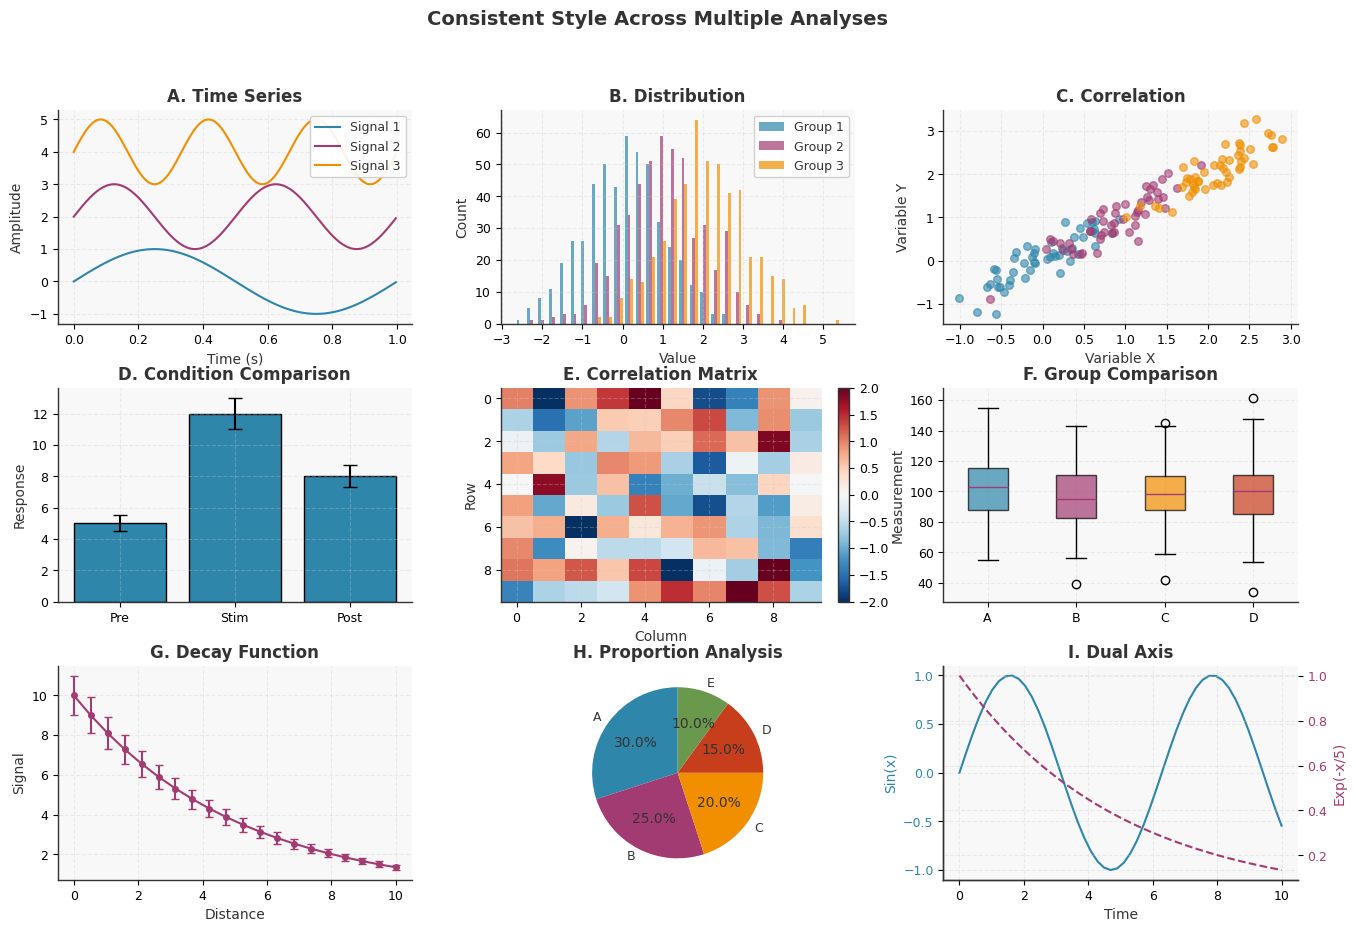


Style Consistency Features:
- Uniform font sizes and families
- Consistent color palette across all plots
- Standardized grid and spine settings
- Matching line weights and marker sizes
- Coherent labeling scheme (A, B, C...)
- Color palette: ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']


In [10]:
# Define a custom style configuration for consistency
def apply_consistent_style():
    """Apply consistent style across all plots."""
    style_params = {
        # Figure
        'figure.figsize': (8, 6),
        'figure.dpi': 100,
        'savefig.dpi': 300,
        'savefig.format': 'png',

        # Fonts
        'font.size': 10,
        'font.family': 'sans-serif',
        'axes.titlesize': 12,
        'axes.titleweight': 'bold',
        'axes.labelsize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,

        # Colors
        'axes.facecolor': '#F8F8F8',
        'figure.facecolor': 'white',
        'axes.edgecolor': '#333333',
        'axes.labelcolor': '#333333',
        'text.color': '#333333',

        # Lines and markers
        'lines.linewidth': 1.5,
        'lines.markersize': 6,
        'axes.linewidth': 1.0,

        # Grid
        'axes.grid': True,
        'axes.grid.axis': 'both',
        'grid.alpha': 0.3,
        'grid.color': '#CCCCCC',
        'grid.linestyle': '--',

        # Spines
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Legend
        'legend.frameon': True,
        'legend.framealpha': 0.9,
        'legend.edgecolor': '#CCCCCC',
        'legend.facecolor': 'white'
    }

    plt.rcParams.update(style_params)

    # Define consistent color palette
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
    plt.rcParams['axes.prop_cycle'] = plt.cycler('color', colors)

    return colors


# Apply consistent style
plt.rcParams.update(plt.rcParamsDefault)
consistent_colors = apply_consistent_style()

# Create a series of consistent plots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.25)

# Main title
fig.suptitle('Consistent Style Across Multiple Analyses',
             fontsize=14,
             fontweight='bold')

# 1. Time series
ax1 = fig.add_subplot(gs[0, 0])
for i in range(3):
    ax1.plot(data['time'][:200],
             np.sin(2 * np.pi * data['time'][:200] * (i + 1)) + i * 2,
             label=f'Signal {i + 1}')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('A. Time Series')
ax1.legend(loc='upper right')

# 2. Histogram
ax2 = fig.add_subplot(gs[0, 1])
hist_data = [np.random.normal(i, 1, 500) for i in range(3)]
ax2.hist(hist_data,
         bins=30,
         alpha=0.7,
         color=consistent_colors[:3],
         label=['Group 1', 'Group 2', 'Group 3'])
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')
ax2.set_title('B. Distribution')
ax2.legend()

# 3. Scatter
ax3 = fig.add_subplot(gs[0, 2])
for i in range(3):
    x = np.random.normal(i, 0.5, 50)
    y = x + np.random.normal(0, 0.3, 50)
    ax3.scatter(x, y, alpha=0.6, s=30)
ax3.set_xlabel('Variable X')
ax3.set_ylabel('Variable Y')
ax3.set_title('C. Correlation')

# 4. Bar plot
ax4 = fig.add_subplot(gs[1, 0])
categories = ['Pre', 'Stim', 'Post']
values = [5, 12, 8]
errors = [0.5, 1, 0.7]
ax4.bar(categories, values, yerr=errors, capsize=5,
        color=consistent_colors[0], edgecolor='black', linewidth=1)
ax4.set_ylabel('Response')
ax4.set_title('D. Condition Comparison')

# 5. Heatmap
ax5 = fig.add_subplot(gs[1, 1])
heatmap_data = np.random.randn(10, 10)
im = ax5.imshow(heatmap_data, cmap='RdBu_r', aspect='auto',
                vmin=-2, vmax=2)
ax5.set_xlabel('Column')
ax5.set_ylabel('Row')
ax5.set_title('E. Correlation Matrix')
plt.colorbar(im, ax=ax5, fraction=0.046)

# 6. Box plot
ax6 = fig.add_subplot(gs[1, 2])
box_data = [np.random.normal(100, 20, 100) for _ in range(4)]
bp = ax6.boxplot(box_data, labels=['A', 'B', 'C', 'D'],
                 patch_artist=True)
for patch, color in zip(bp['boxes'], consistent_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax6.set_ylabel('Measurement')
ax6.set_title('F. Group Comparison')

# 7. Line plot with error
ax7 = fig.add_subplot(gs[2, 0])
x = np.linspace(0, 10, 20)
y = np.exp(-x / 5) * 10
yerr = y * 0.1
ax7.errorbar(x, y, yerr=yerr, fmt='o-', capsize=3,
             color=consistent_colors[1], markersize=4)
ax7.set_xlabel('Distance')
ax7.set_ylabel('Signal')
ax7.set_title('G. Decay Function')

# 8. Pie chart
ax8 = fig.add_subplot(gs[2, 1])
sizes = [30, 25, 20, 15, 10]
ax8.pie(sizes, labels=['A', 'B', 'C', 'D', 'E'],
        colors=consistent_colors, autopct='%1.1f%%',
        startangle=90)
ax8.set_title('H. Proportion Analysis')

# 9. Combined plot
ax9 = fig.add_subplot(gs[2, 2])
ax9_twin = ax9.twinx()
x = np.linspace(0, 10, 50)
ax9.plot(x, np.sin(x), color=consistent_colors[0], label='Sin')
ax9_twin.plot(x, np.exp(-x / 5), color=consistent_colors[1],
              linestyle='--', label='Exp')
ax9.set_xlabel('Time')
ax9.set_ylabel('Sin(x)', color=consistent_colors[0])
ax9_twin.set_ylabel('Exp(-x/5)', color=consistent_colors[1])
ax9.tick_params(axis='y', labelcolor=consistent_colors[0])
ax9_twin.tick_params(axis='y', labelcolor=consistent_colors[1])
ax9.set_title('I. Dual Axis')

# plt.savefig(output_dir / 'consistent_style.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nStyle Consistency Features:")
print("- Uniform font sizes and families")
print("- Consistent color palette across all plots")
print("- Standardized grid and spine settings")
print("- Matching line weights and marker sizes")
print("- Coherent labeling scheme (A, B, C...)")
print(f"- Color palette: {consistent_colors}")

## 10. Export Formats and Quality Optimization

Different output formats and settings are optimal for various publication media.

Export Format Comparison:

journal_print:
  Format: PDF
  DPI: 600
  Use case: High-resolution PDF for journal printing

journal_submission:
  Format: EPS
  DPI: 300
  Use case: EPS format for journal submission

presentation:
  Format: PNG
  DPI: 150
  Use case: PNG with transparency for presentations

web_display:
  Format: SVG
  DPI: 72
  Use case: Scalable vector graphics for web

poster:
  Format: PDF
  DPI: 300
  Use case: High-quality PDF for poster printing

manuscript_draft:
  Format: PNG
  DPI: 100
  Use case: Quick PNG for manuscript drafts


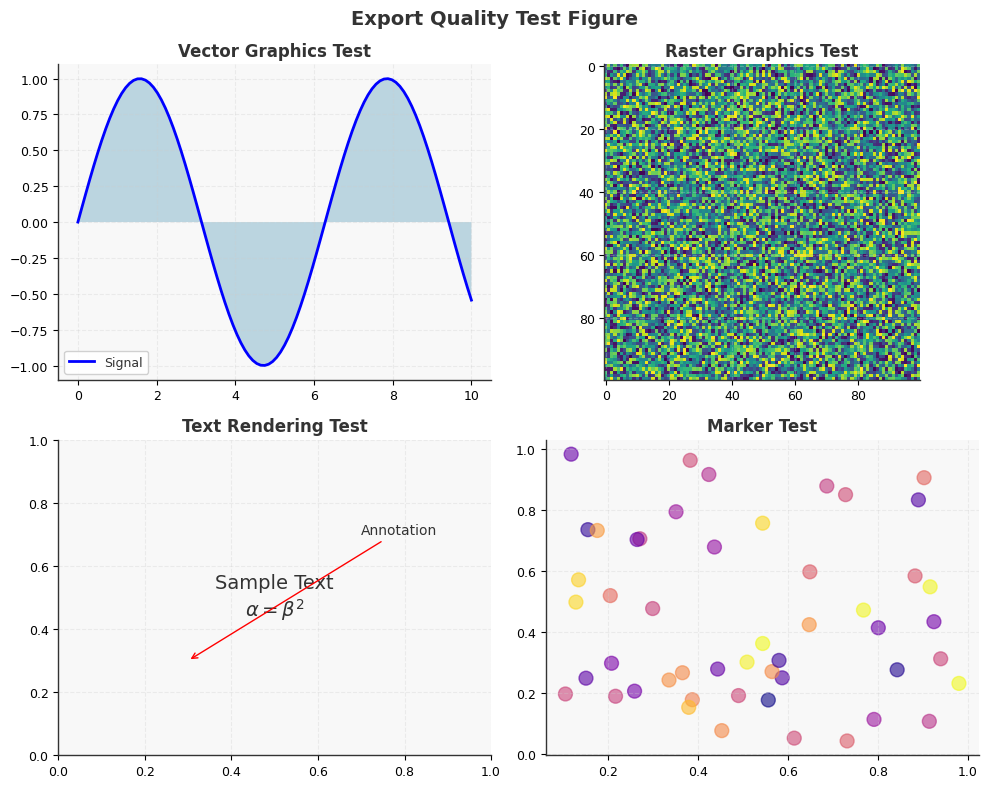

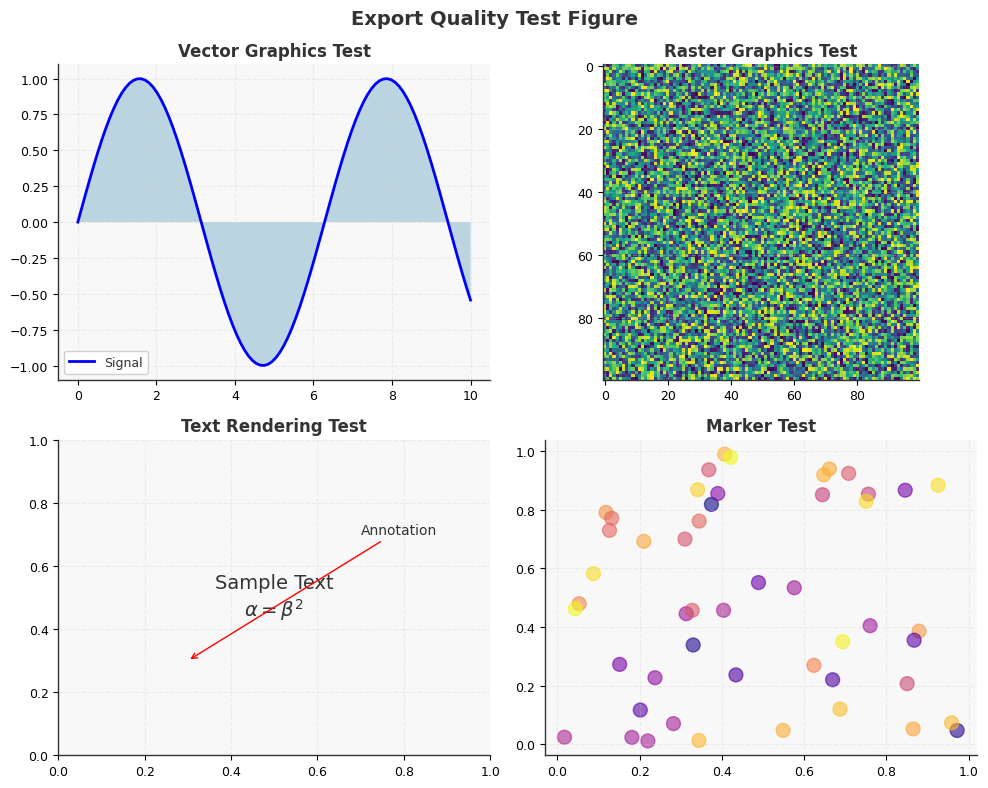


Export Best Practices:

1. Vector Formats (PDF, EPS, SVG):
   - Best for line plots, text, and simple graphics
   - Scalable without quality loss
   - Larger files for complex images

2. Raster Formats (PNG, JPEG):
   - Best for complex images and photos
   - Fixed resolution (choose DPI carefully)
   - PNG supports transparency

3. DPI Guidelines:
   - Print: 300-600 DPI
   - Screen/Web: 72-150 DPI
   - Posters: 150-300 DPI

4. Format Selection:
   - Journals: PDF or EPS
   - Web: SVG or PNG
   - Presentations: PNG with transparency
   - Drafts: Low-DPI PNG for speed


In [12]:
# Demonstrate export optimization for different media

# Create a sample figure for export testing
def create_export_figure():
    """Create a figure with various elements for export testing."""
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Add various plot elements
    # 1. Vector elements (lines)
    x = np.linspace(0, 10, 100)
    axes[0, 0].plot(x, np.sin(x), 'b-', linewidth=2, label='Signal')
    axes[0, 0].fill_between(x, 0, np.sin(x), alpha=0.3)
    axes[0, 0].set_title('Vector Graphics Test')
    axes[0, 0].legend()

    # 2. Raster elements (image)
    image_data = np.random.rand(100, 100)
    axes[0, 1].imshow(image_data, cmap='viridis')
    axes[0, 1].set_title('Raster Graphics Test')

    # 3. Text and annotations
    axes[1, 0].text(0.5, 0.5, 'Sample Text\n$\\alpha = \\beta^2$',
                    ha='center', va='center', fontsize=14,
                    transform=axes[1, 0].transAxes)
    axes[1, 0].annotate('Annotation', xy=(0.3, 0.3), xytext=(0.7, 0.7),
                        arrowprops=dict(arrowstyle='->', color='red'),
                        transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Text Rendering Test')

    # 4. Markers and scatter
    axes[1, 1].scatter(np.random.rand(50), np.random.rand(50),
                       s=100, alpha=0.6, c=np.random.rand(50), cmap='plasma')
    axes[1, 1].set_title('Marker Test')

    fig.suptitle('Export Quality Test Figure', fontsize=14, fontweight='bold')
    plt.tight_layout()

    return fig


# Export configurations for different purposes
export_configs = {
    'journal_print': {
        'format': 'pdf',
        'dpi': 600,
        'bbox_inches': 'tight',
        'pad_inches': 0.1,
        'transparent': False,
        'description': 'High-resolution PDF for journal printing'
    },
    'journal_submission': {
        'format': 'eps',
        'dpi': 300,
        'bbox_inches': 'tight',
        'pad_inches': 0.05,
        'transparent': False,
        'description': 'EPS format for journal submission'
    },
    'presentation': {
        'format': 'png',
        'dpi': 150,
        'bbox_inches': 'tight',
        'pad_inches': 0.2,
        'transparent': True,
        'description': 'PNG with transparency for presentations'
    },
    'web_display': {
        'format': 'svg',
        'dpi': 72,
        'bbox_inches': 'tight',
        'pad_inches': 0.1,
        'transparent': False,
        'description': 'Scalable vector graphics for web'
    },
    'poster': {
        'format': 'pdf',
        'dpi': 300,
        'bbox_inches': None,
        'pad_inches': 0.5,
        'transparent': False,
        'description': 'High-quality PDF for poster printing'
    },
    'manuscript_draft': {
        'format': 'png',
        'dpi': 100,
        'bbox_inches': 'tight',
        'pad_inches': 0.1,
        'transparent': False,
        'description': 'Quick PNG for manuscript drafts'
    }
}

# Create and export figure in different formats
print("Export Format Comparison:")
print("=" * 50)

fig = create_export_figure()

# Export in each format and report file sizes
import os

for name, config in export_configs.items():
    filename = output_dir / f'export_test.{config["format"]}'

    # Remove format from config dict for savefig
    save_config = {k: v for k, v in config.items() if k != 'format' and k != 'description'}

    # fig.savefig(filename, format=config['format'], **save_config)

    # # Get file size
    # file_size = os.path.getsize(filename) / 1024  # in KB

    print(f"\n{name}:")
    print(f"  Format: {config['format'].upper()}")
    print(f"  DPI: {config['dpi']}")
    # print(f"  File size: {file_size:.1f} KB")
    print(f"  Use case: {config['description']}")

plt.show()

# Best practices summary
print("\n" + "=" * 50)
print("Export Best Practices:")
print("\n1. Vector Formats (PDF, EPS, SVG):")
print("   - Best for line plots, text, and simple graphics")
print("   - Scalable without quality loss")
print("   - Larger files for complex images")

print("\n2. Raster Formats (PNG, JPEG):")
print("   - Best for complex images and photos")
print("   - Fixed resolution (choose DPI carefully)")
print("   - PNG supports transparency")

print("\n3. DPI Guidelines:")
print("   - Print: 300-600 DPI")
print("   - Screen/Web: 72-150 DPI")
print("   - Posters: 150-300 DPI")

print("\n4. Format Selection:")
print("   - Journals: PDF or EPS")
print("   - Web: SVG or PNG")
print("   - Presentations: PNG with transparency")
print("   - Drafts: Low-DPI PNG for speed")

## 11. Complete Style Gallery

A comprehensive comparison of all styling options for quick reference.

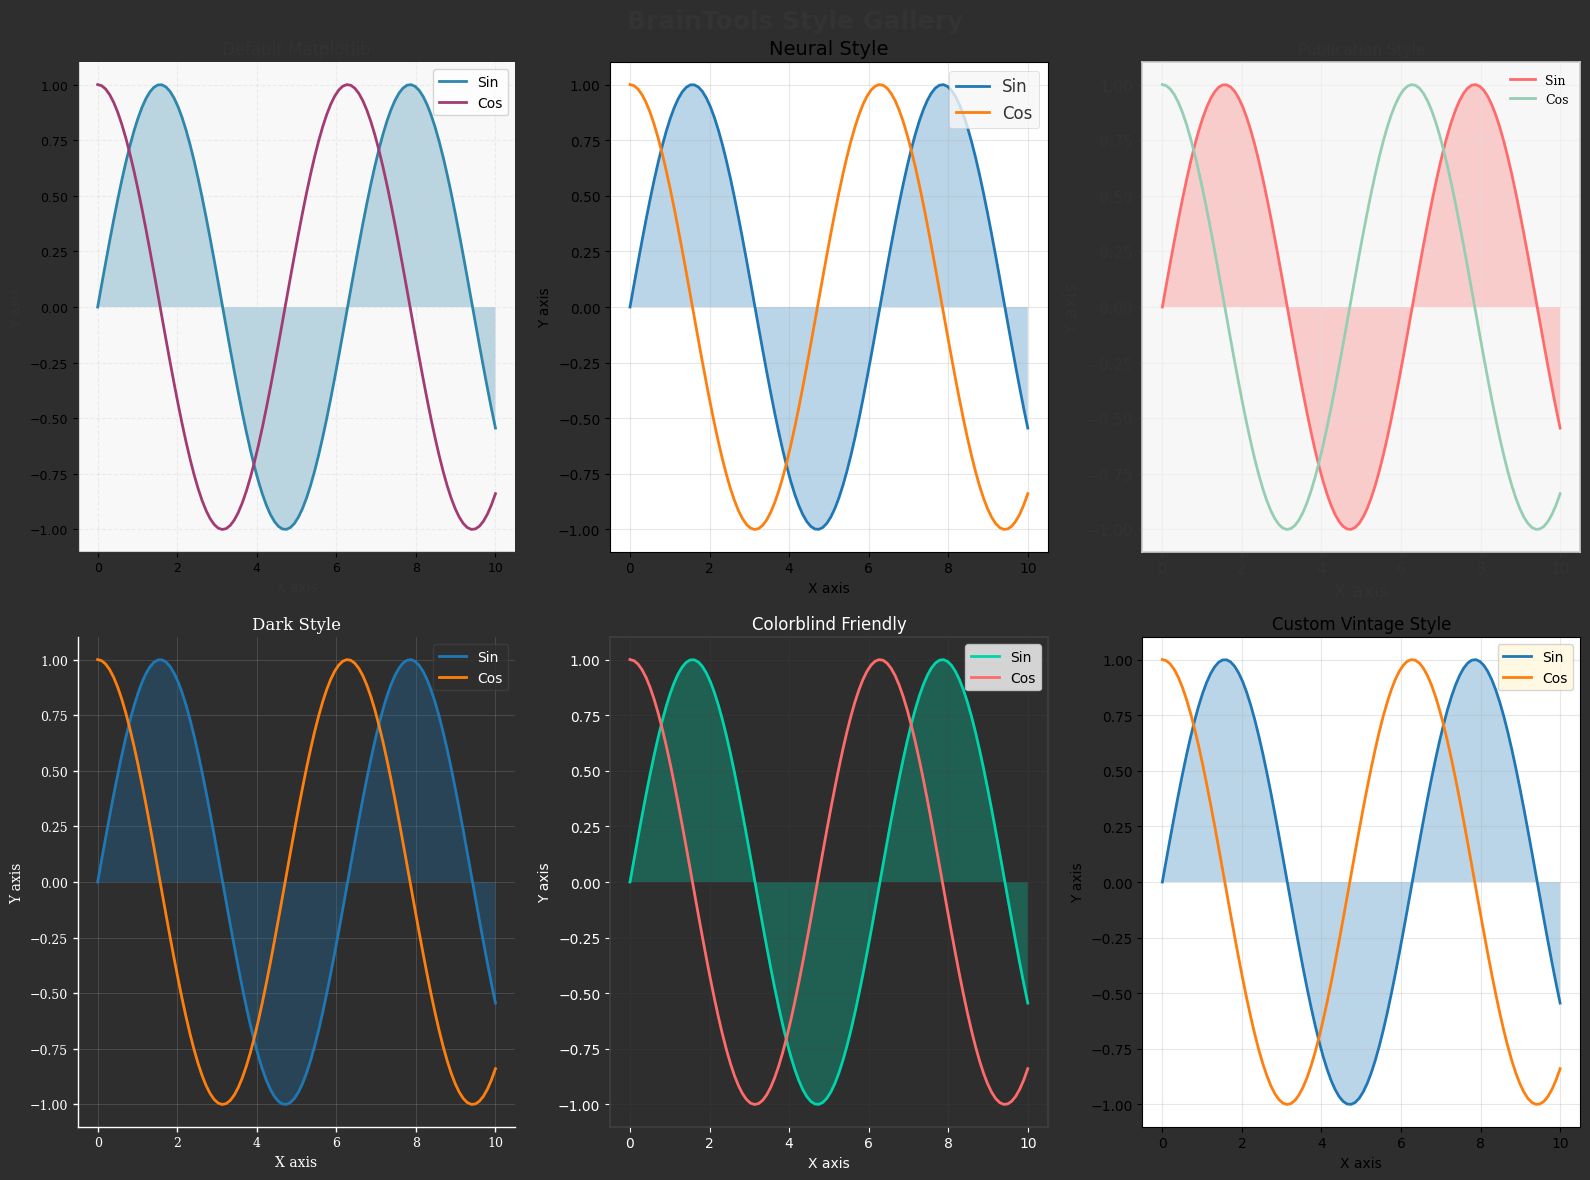


Style Gallery Summary:
Available styles in BrainTools:
1. Neural Style - Optimized for neural data
2. Publication Style - Journal-ready formatting
3. Dark Style - For presentations
4. Colorblind Friendly - Accessible colors
5. Custom Styles - Create your own themes

All styles can be customized with additional parameters.


In [13]:
# Create a comprehensive style gallery

def plot_sample(ax, style_name):
    """Create a sample plot with given style."""
    x = np.linspace(0, 10, 100)
    y1 = np.sin(x)
    y2 = np.cos(x)

    ax.plot(x, y1, label='Sin', linewidth=2)
    ax.plot(x, y2, label='Cos', linewidth=2)
    ax.fill_between(x, 0, y1, alpha=0.3)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(style_name)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)


# Create figure with subplots for each style
fig = plt.figure(figsize=(16, 12))
fig.suptitle('BrainTools Style Gallery', fontsize=18, fontweight='bold')

styles = [
    ('Default Matplotlib', None),
    ('Neural Style', 'neural'),
    ('Publication Style', 'publication'),
    ('Dark Style', 'dark'),
    ('Colorblind Friendly', 'colorblind')
]

# Add a custom style
custom_style_params = {
    'axes.facecolor': '#FFF8DC',
    'figure.facecolor': '#F5F5DC',
    'axes.edgecolor': '#8B4513',
    'axes.linewidth': 2,
    'grid.color': '#DEB887',
    'grid.alpha': 0.5
}

for i, (name, style) in enumerate(styles):
    ax = fig.add_subplot(2, 3, i + 1)

    # Apply style
    if style is None:
        plt.rcParams.update(plt.rcParamsDefault)
    else:
        plt.rcParams.update(plt.rcParamsDefault)
        apply_style(style)

    plot_sample(ax, name)

    # For dark style, adjust background
    if style == 'dark':
        ax.set_facecolor('#2E2E2E')
        ax.figure.patch.set_facecolor('#2E2E2E')
        for text in [ax.title, ax.xaxis.label, ax.yaxis.label]:
            text.set_color('white')
        ax.tick_params(colors='white')
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')

# Add custom style
ax = fig.add_subplot(2, 3, 6)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(custom_style_params)
plot_sample(ax, 'Custom Vintage Style')

plt.tight_layout()
# plt.savefig(output_dir / 'style_gallery.png', dpi=150, bbox_inches='tight')
plt.show()

# Reset to default
plt.rcParams.update(plt.rcParamsDefault)

print("\nStyle Gallery Summary:")
print("=" * 50)
print("Available styles in BrainTools:")
print("1. Neural Style - Optimized for neural data")
print("2. Publication Style - Journal-ready formatting")
print("3. Dark Style - For presentations")
print("4. Colorblind Friendly - Accessible colors")
print("5. Custom Styles - Create your own themes")
print("\nAll styles can be customized with additional parameters.")

## Summary and Best Practices

This tutorial has covered comprehensive styling and theming capabilities in BrainTools:


1. **Neural-Specific Styling**
   - Optimized colors for spike data and membrane potentials
   - Appropriate grid and axis settings for temporal data

2. **Publication-Ready Formatting**
   - High DPI settings for print quality
   - Clean, minimal design with proper labeling
   - Multiple export formats (PDF, EPS, PNG)

3. **Dark Mode Themes**
   - High-contrast colors for presentations
   - Reduced eye strain for extended viewing

4. **Accessibility**
   - Colorblind-friendly palettes
   - Redundant encoding with patterns and shapes
   - Clear contrast ratios

5. **Custom Colormaps**
   - Tailored to specific data types
   - Perceptually uniform gradients
   - Brain-specific color schemes


Export Guidelines:

| Medium | Format | DPI | Notes |
|--------|--------|-----|-------|
| Journal | PDF/EPS | 300-600 | Vector when possible |
| Presentation | PNG | 150 | Transparent background |
| Web | SVG/PNG | 72-150 | Optimize file size |
| Poster | PDF | 300 | Large format support |

The styling capabilities in BrainTools enable professional, accessible, and beautiful visualizations for all aspects of neuroscience communication.